# Lab 3 Exploring Image Data 
Group members: Jingzhen Hu, Yichen Duan, Chuhan Jin

## 1 Business Understanding 
Overview:

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?)

We select the set of images containing undistorted, naturally-blurred and artificially-blurred images. Our goal is to use this dataset which download from (http://mklab.iti.gr/project/imageblur) as a training dataset to make a classification (using image quality assesment) between the three types of image mentioned above. 

Here is the description from the website: "The CERTH image blur dataset consists of 2450 digital images, 1850 out of which are photographs captured by various camera models in different shooting conditions that have not been altered in any way following their capture. The remaining 600 are artificially-blurred images. For their creation, 60 undistorted images were randomly selected and then several types of Gaussian, motion and circular averaging filters were applied to them."

Why is this data important? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful?

As the development of high-technique, more and more people love record their live using electronic diary, recording, and most commonly photos. However, not all of us are photographers, so we usually have blurred photos due to many reasons. It is good for us to know the assessment of a photo automatically so that we can know whether we need to take another immediately in order not to miss something that we really want to record such as beautiful view, commencement, etc. If the image is naturally-blurred, then we might not need to take it again because the blur is caused by the objective reasons. However, if the photo is defined by artificially-blurred, then we can take it again immediately. More important, it has the application on crime detection. If a proof is provided with a blurred photo, people need to detect whether it is an artificially-blurred image or a naturally-blurred image. 

The dataset is really comprehensive based on our goal to make evulation of photos. It classifies photos into three types - undistorted, naturally-blurred, and artificially-blurred. In specific, the training set has 630 undistorted images, 220 naturally-blurred images, 150 artificially-blurred images. As photos need more room to storage them, we try to use the least amount of them to maximize the accuracy of prediction. It is hard to say that we can hit the answer 100% but we would like to search for some underlying patterns in each classification. For example, before beginning analyizing our dataset, it is reasonable to have a common sense that the blurred photos has less RAM than the undistorted ones. Although we do not know the difference between naturally-blurred and artificially-blurred which is what we really want to know. After Detecting the patterns, it is possible to make a test dataset to measure the accuracy of prediction. According to our limited amount training set and the diffculty identification between atricicially-blurred and naturally-burred, if the algorithm performs between 70%-90% roughly, then it is considered useful and leave room to make further improvement like taking more training dataset, change the way of sampling, or use different feature extracted methods. Comparing with the way that people use eye to identify the photo which costing more time with not 100% accuracy, if our developing algorithm could give a relatively similar result immediately, then it is considered useful. Even without the time push, if our algorithm can detect for details between artificially-blurred image and naturally-blurred image, it can apply into differentiate the truth of proofs.


## 2 Data Preparation
### 2.1

Here, Read the 1000 images data as numpy arrays and only keep the 64\*64 in the middle of each image. As our topic is to detect the blur, then it is better to keep the original quaility of image but choosing s subset of them.

In [1]:
from PIL import Image
import numpy as np
import glob
import scipy.misc

def load_images(path):
    path1 = ''.join([path,'*.JPG'])
    path2 = ''.join([path,'*.jpg'])
    image_list = [];
    for filename in glob.glob(path1): 
        im=Image.open(filename)
        im_np = np.asarray(im,)
        hi,wi, ci = im_np.shape
        hi = int(hi/2)
        wi = int(wi/2)
        im_np = im_np[hi:hi+64,wi:wi+64,1] 
        image_list.append(im_np)
        im.close()
    for filename in glob.glob(path2): 
        im=Image.open(filename)
        im_np = np.asarray(im,)
        hi,wi, ci = im_np.shape
        hi = int(hi/2)
        wi = int(wi/2)
        im_np = im_np[hi:hi+64,wi:wi+64,1] 
        image_list.append(im_np)
        im.close()
    return image_list
path1 = 'CERTH_ImageBlurDataset/TrainingSet/Artificially-Blurred/'
arti_blur = load_images(path1)
print(len(arti_blur))
path2 = 'CERTH_ImageBlurDataset/TrainingSet/Naturally-Blurred/'
natu_blur = load_images(path2)
print(len(natu_blur))
path3 = 'CERTH_ImageBlurDataset/TrainingSet/Undistorted/'
undistorted = load_images(path3)
print(len(undistorted))

150
220
630


###  2.2
Linearize the images to create a table of 1-D image features (each row should be one image).   

In [ ]:
arti_blur_flat = []
natu_blur_flat = []
undistorted_flat = []
for each in arti_blur:
    arti_blur_flat.append(each.reshape((1,-1)))
for each in natu_blur:
    natu_blur_flat.append(each.reshape((1,-1)))
for each in undistorted:
    undistorted_flat.append(each.reshape((1,-1)))

# convert it into a numpy matrix
arti_blur_table = np.array(arti_blur_flat).reshape((len(arti_blur),-1))
natu_blur_table = np.array(natu_blur_flat).reshape((len(natu_blur),-1))
undistorted_table = np.array(undistorted_flat).reshape((len(undistorted),-1))


In [ ]:
np.save('ab.npy',arti_blur_table)
np.save('nb.npy',natu_blur_table)
np.save('un.npy',undistorted_table)


In [1]:
import numpy as np
arti_blur_table   =np.load('ab.npy')
natu_blur_table   =np.load('nb.npy')
undistorted_table =np.load('un.npy')

In [2]:
print(arti_blur_table.shape)
arti_blur_table

(150, 4096)


array([[ 84,  84,  85, ..., 185, 186, 186],
       [182, 183, 184, ..., 129, 131, 132],
       [168, 169, 171, ..., 169, 170, 171],
       ..., 
       [ 18,  18,  18, ...,  15,  15,  15],
       [125, 125, 125, ..., 107, 106, 107],
       [126, 127, 127, ...,  97,  97,  97]], dtype=uint8)

In [3]:
print(natu_blur_table.shape)
natu_blur_table

(220, 4096)


array([[ 46,  47,  47, ...,  62,  63,  65],
       [110, 110, 110, ..., 100, 100,  97],
       [102, 100,  96, ...,  91,  88,  93],
       ..., 
       [ 45,  41,  44, ...,  43,  41,  38],
       [245, 246, 248, ..., 163, 163, 163],
       [174, 175, 175, ..., 174, 174, 175]], dtype=uint8)

In [4]:
print(undistorted_table.shape)
undistorted_table

(630, 4096)


array([[125, 118, 108, ..., 115, 116, 118],
       [ 35,  34,  38, ...,  20,  21,  25],
       [ 49,  47,  46, ...,   5,  27,  26],
       ..., 
       [ 81,  72,  49, ...,  78,  82,  84],
       [103, 105, 111, ..., 167, 166, 165],
       [ 55,  58,  52, ...,  90,  98, 125]], dtype=uint8)

### 2.3 Visualize several images
We decide to show three images, one for each class. Then, we show the image gallery with randomly choice from the three classes.

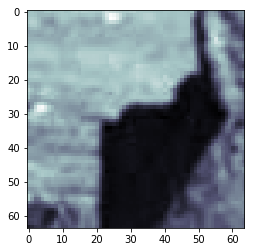

In [5]:
import matplotlib.pyplot as plt
plt.imshow(arti_blur_table[67].reshape(64,64),cmap='bone')
plt.show()


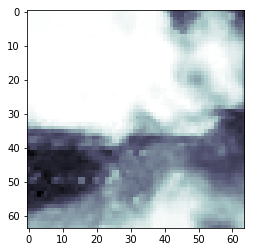

In [6]:
plt.imshow(natu_blur_table[143].reshape(64,64),cmap='bone')
plt.show()

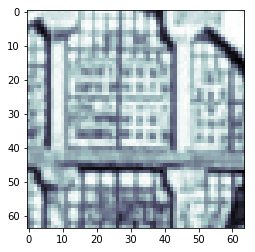

In [7]:
plt.imshow(undistorted_table[43].reshape(64,64),cmap='bone')
plt.show()


In [8]:
# combine the three classes together
X = np.asarray(np.vstack((arti_blur_table,natu_blur_table,undistorted_table))) 
X = X/255.0
n_samples, n_features = X.shape
# every image is convert into the same size when loading
h = 64
w = 64
art = np.array(['artifically-blur']*150)
nat = np.array(['naturally-blur']*220)
undis = np.array(['undistorted']*630)
y = np.concatenate((art, nat,undis))
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(3))
print("Original Image Sizes {}by{}".format(h,w))

n_samples: 1000
n_features: 4096
n_classes: 3
Original Image Sizes 64by64


(1000, 4096)


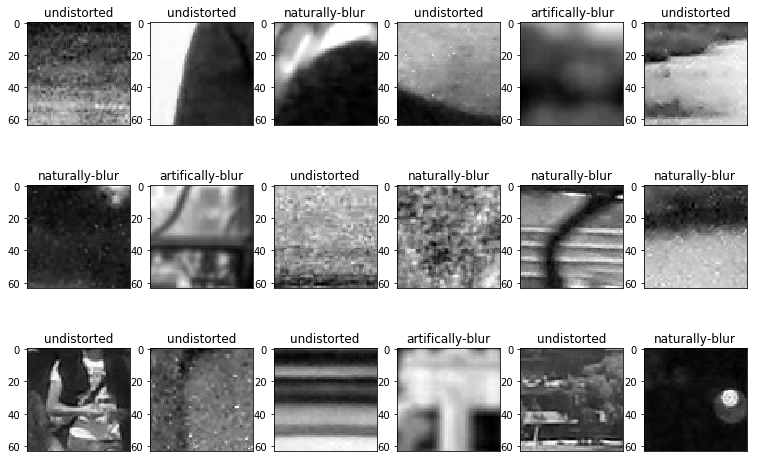

In [9]:
# a helper plotting function
import random
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a random of photos"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        select = random.randint(0, len(images))
        plt.imshow(images[select].reshape(64,64), cmap=plt.cm.gray)
        plt.title(titles[select], size=12)
        plt.xticks(())
        plt.yticks
    plt.show()
temp = np.asarray(np.vstack((arti_blur_table,natu_blur_table,undistorted_table))) 
print(temp.shape)
plot_gallery(temp, y, h, w) # defaults to showing a 3 by 6 subset of the faces

## 3 Data Reduction
### 3.1 Linear dimensionality reduction
Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. 

In [10]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

In [11]:
from sklearn.decomposition import PCA
        
pca = PCA(n_components=200)
%time pca.fit(X.copy())
plot_explained_variance(pca)

CPU times: user 1.51 s, sys: 137 ms, total: 1.65 s
Wall time: 949 ms


Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.

As we can see in the plot above, if cutting down the number of features to be even 9 (around 3*3), 90.33% of original image can be keep or represent. And if we keep about 200 features (around 14.1*14.1), 99.34% of original image can be kept. And if we would like to keep 99% of original image, then the cut-off number of features is 159 (around 12.6*12.6). We are going to test for the reduced form of 90% and 99% and plot them to see the result directly. 

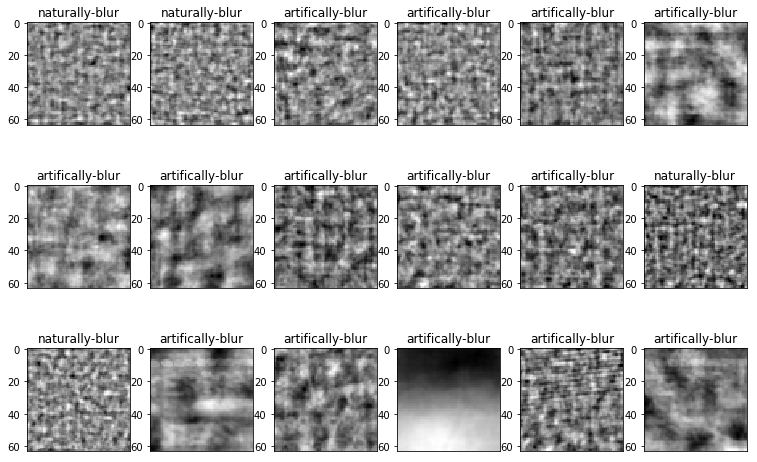

In [12]:
reduced_photo = pca.components_.reshape((200, h, w ))
plot_gallery(reduced_photo, y, h, w)


As each time calling plot_gallery involves a random select, it is hard for us to tell how well the reconstruction works. We then choose to reconstruct one of the picture and comapre it with the original image with different number of cutoff components to test for the effect of PCA.

In [13]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

idx_to_reconstruct = 155 
X_idx = X[idx_to_reconstruct]

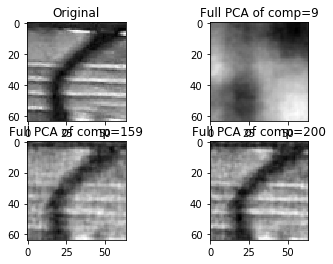

In [14]:
pca = PCA(n_components=9)
pca.fit(X.copy())
low_dimensional_representation_9, reconstructed_image_9 = reconstruct_image(pca,X_idx.reshape(1, -1))

pca = PCA(n_components=159)
pca.fit(X.copy())
low_dimensional_representation_159, reconstructed_image_159 = reconstruct_image(pca,X_idx.reshape(1, -1))

pca = PCA(n_components=200)
pca.fit(X.copy())
low_dimensional_representation_200, reconstructed_image_200 = reconstruct_image(pca,X_idx.reshape(1, -1))

# f, axarr = plt.subplots(4)
# axarr[0].imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
# axarr[0].set_title('Original')

# axarr[1].imshow(reconstructed_image_9.reshape((h, w)), cmap=plt.cm.gray)
# axarr[1].set_title('Full PCA of comp=9')

# axarr[2].imshow(reconstructed_image_159.reshape((h, w)), cmap=plt.cm.gray)
# axarr[2].set_title('Full PCA of comp=159')

# axarr[3].imshow(reconstructed_image_200.reshape((h, w)), cmap=plt.cm.gray)
# axarr[3].set_title('Full PCA of comp=200')

plt.subplot(2,2,1)
ax = plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(reconstructed_image_9.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Full PCA of comp=9')

plt.subplot(2,2,3)
plt.imshow(reconstructed_image_159.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Full PCA of comp=159')

plt.subplot(2,2,4)
plt.imshow(reconstructed_image_200.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Full PCA of comp=200')

plt.show()

Here, we construct the $155^{th}$ image using different cut-down PCA components. As we predicted, with the number of compoenents grow up, the image is more similar as the original. It is obviously that we cannot choose to cut down the feature number to 9 of which 90% of representation does not make sense for us in the plot. It is reasobale to choose either 159 or 200 as the cut-down feature number. We prefer to choose 200 (round 14\*14) becuase it only increases by 2 for width and height but the result above is more clear than the 159-component reconstruct. 
Thus, we could resize the image down to 14*14 and still have sufficient representation of the original images.

### 3.2 Nonlinear dimensionality reduction
Perform non-linear dimensionality reduction of your image data. Compare the representation using non-linear dimensions to using linear dimensions. Do you prefer one method over another? Why?

To compare with linear PCA, we keep the consistent 200 component and watch the reconstruct image to see the difference and finally will lead to a conclusion.

In [15]:
%%time
# SKIP THIS BECAUSE IT TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 200
# print(np.sum(~np.isfinite(X)))
print ("Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=15, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 200 eigenfaces from 1000 faces
CPU times: user 1min 13s, sys: 1.35 s, total: 1min 14s
Wall time: 38.5 s


In [16]:
# the above operation takes a long time to save the inverse transform parameters
# so let's save out the results to load in later!
import pickle

pickle.dump(kpca, open( 'kpca.p', 'wb' ))

In [17]:
import pickle
kpca_loaded = pickle.load(open( 'kpca.p', 'rb' ))

In [18]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

from ipywidgets import widgets  # make this interactive!
# compare the different methods

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca_loaded.inverse_transform(kpca_loaded.transform(X[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(X[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(y[idx_to_reconstruct])
    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
    plt.show()
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

<function __main__.plt_reconstruct>

We choose lots of samples to compare linear and nonlinear PCA. The overall results show that Kernel PCA is better than Full PCA based on the dataset we chosen. Especially, for the image $203^{rd}$, $212^{nd}$, $279^{th}$, $557^{th}$, $656^{th}$, $808^{th}$ and $895^{th}$, the kernel PCA is better recovery of the original image than full PCA. Thus, We prefer the nonlinear PCA rather than PCA for our dataset. The reason behind it might be that in Kernel PCA, the data are mapped into a higher-dimensional space. Then, the original data turns out to lie on a lower dimensional subspace of a higher-dimensional space. Thus, it increases the dimensionality in order to be able to decrease the dimensions further. Although there exists some rare example like $661^{st}$, the pillar in the Kernel PCA seems higher than the original one, we still think Kernel PCA is better because it reduce most of rest of images to be considered visually colser to the original one. 
Also, as our photo is taking of things that are not restricted. Most of them can have nonlinear pattern rather than linear forms. That is a reason to choose Kernel PCA instead of Full PCA as well. 


### 3.3 Feature extraction
Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).

We choose DAISY and gabor filters to extract features. However, our case is not to identify the same pattern or form of certain objects, animials or faces. Also, our case is not involve about recovering a whole image by seeing just part of them. We knew that DAISY is the common and efficient method to identify the patterns like corners and also is more flexible about the input parameters such as teh radius of circle, steps, and the number of rings, etc. In the same time, one view is that gabor filters can perform better in edege detecting which seems to be related our topics which blurring will lead some change in edges. Thus, we choose to try both of the method and see how can they represent our target classes well. 

First, we try to see how the DAISY works on one image in our dataset in order to change the paremeters so that there can be some overlaps. Afterward, we can apply to the whole dataset. 

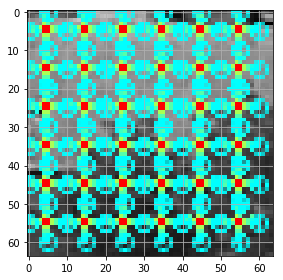

In [19]:
from skimage.io import imshow
from skimage.feature import daisy

features, img_desc = daisy(X[569].reshape((h,w)),step=10, radius=5, rings=3, histograms=4, orientations=8, visualize=True)
imshow(img_desc)
plt.grid()
plt.show()

In [20]:
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=20, radius=5, rings=3, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

In [21]:
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)

CPU times: user 9.39 s, sys: 1.09 s, total: 10.5 s
Wall time: 11.1 s
(1000, 1368)


In [22]:
daisy_features

array([[ 0.00106151,  0.00021694,  0.00016096, ...,  0.00524714,
         0.00107364,  0.00131694],
       [ 0.01139859,  0.02342334,  0.01253541, ...,  0.02058124,
         0.01528743,  0.00367432],
       [ 0.0025267 ,  0.01377784,  0.02580423, ...,  0.00634935,
         0.00804396,  0.00450882],
       ..., 
       [ 0.00124401,  0.00160257,  0.00217909, ...,  0.00871463,
         0.00803741,  0.00679228],
       [ 0.00293105,  0.00615573,  0.00461004, ...,  0.02652203,
         0.02364951,  0.01004609],
       [ 0.00189659,  0.0025927 ,  0.0042338 , ...,  0.00899389,
         0.00978747,  0.00868426]])

In [23]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time daisy_dist_matrix = pairwise_distances(daisy_features)
daisy_dist_matrix.shape

CPU times: user 93.4 ms, sys: 4.25 ms, total: 97.6 ms
Wall time: 59.4 ms


(1000, 1000)

In [24]:
from ipywidgets import fixed
# put it together inside a nice widget
def closest_image(dmat,idx1):
    import copy
    
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    imshow(X[idx1].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Original "+ y[idx1] + "(" + str(idx1) + ")")
    plt.grid()

    plt.subplot(1,3,2)
    imshow(X[idx2].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Closest "+ y[idx2] + "(" + str(idx2) + ")")
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(X[idx3].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Next Closest "+ y[idx3] + "(" + str(idx3) + ")")
    plt.grid()
    plt.show()
# widgets.interact(closest_image,idx1=(0,999,1),dmat=fixed(daisy_dist_matrix),__manual=True)


/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning:

Low image data range; displaying image with stretched contrast.



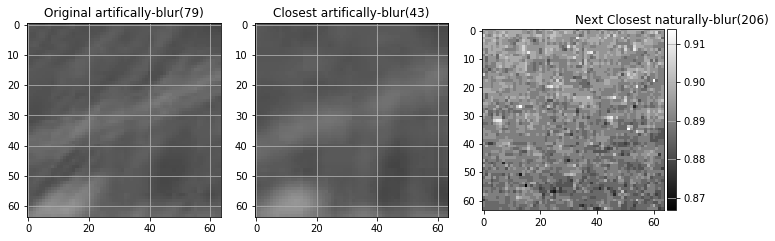

In [25]:
closest_image(daisy_dist_matrix,79)

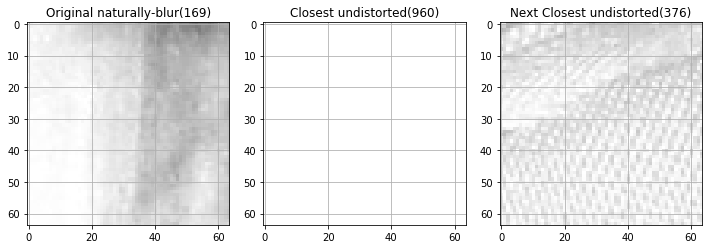

In [26]:
closest_image(daisy_dist_matrix,169)

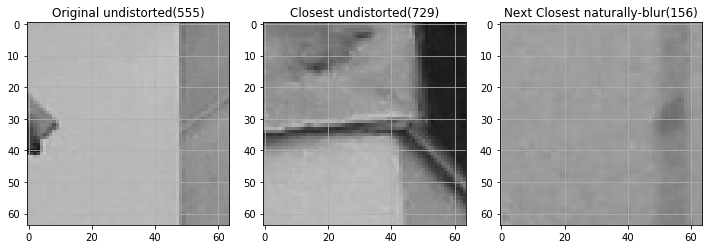

In [27]:
closest_image(daisy_dist_matrix,555)

As we choose one cases of each class to detect the closest image (it is just a slice of seeing the classification and cannot represent the whole classificaton. However, if the closest image is not in the same type, then we can say the features is not sufficient to classification. Even it is good for the closest and next closest image are in the same type, we still need to do analysis of the statistic of features extracted later.), it is a sad story that the pairwise distance matrix calculated based on the feature ectracted by DAISY is hard to tell the photo is artificially-blurred, naturally-blurred, or undistorted. We try grabor for now and analysis the statistic of the two methods afterward.

In [28]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from scipy import stats

# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

            
# compute the filter bank and take statistics of image
def compute_gabor(row, kernels, shape):
    feats = np.zeros((len(kernels), 4), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(row.reshape(shape), kernel, mode='wrap')
        _,_,feats[k,0],feats[k,1],feats[k,2],feats[k,3] = stats.describe(filtered.reshape(-1))
        # mean, var, skew, kurt
        
    return feats.reshape(-1)

In [29]:
%time gabor_features = np.apply_along_axis(compute_gabor, 1, X, kernels, (h,w))
print(gabor_features.shape)

CPU times: user 42.5 s, sys: 627 ms, total: 43.1 s
Wall time: 45.2 s
(1000, 64)


In [30]:
gabor_features

array([[  6.62930158e-01,   5.05866724e-03,  -1.59557011e+00, ...,
          2.48598136e-07,  -1.34199802e+00,   9.60263647e+01],
       [  5.13576286e-01,   8.14857435e-03,   2.48110991e-01, ...,
          9.58956194e-08,   1.00747676e-01,   3.42717075e+00],
       [  6.16377722e-01,   5.35292721e-03,  -1.57007342e-01, ...,
          8.71428331e-08,   1.62429499e-01,   5.06049645e+00],
       ..., 
       [  3.29915487e-01,   8.56497503e-03,  -2.01180571e-01, ...,
          4.14491079e-05,   1.66812232e-02,   1.12921028e+00],
       [  4.74319958e-01,   2.31038003e-02,  -5.11404483e-01, ...,
          1.47222306e-05,  -4.70328685e-03,   4.11585747e+00],
       [  3.31558911e-01,   1.46107059e-02,  -3.47271338e-02, ...,
          1.40410390e-05,  -8.92151008e-03,   1.28063308e+00]])

In [31]:
# gabor
%time gabor_dist_matrix = pairwise_distances(gabor_features)
gabor_dist_matrix.shape

CPU times: user 29.6 ms, sys: 5.47 ms, total: 35.1 ms
Wall time: 25.2 ms


(1000, 1000)

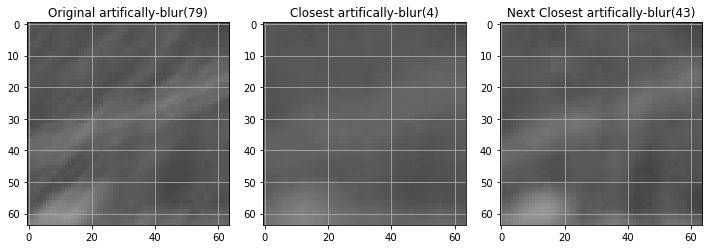

In [32]:
closest_image(gabor_dist_matrix,79)

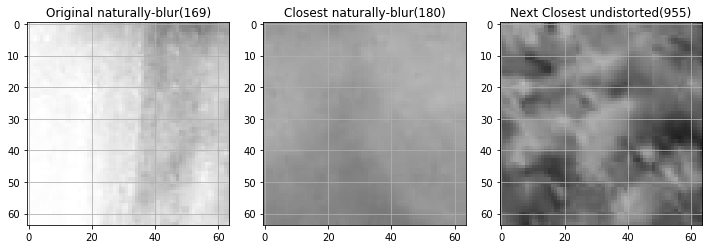

In [33]:
closest_image(gabor_dist_matrix,169)

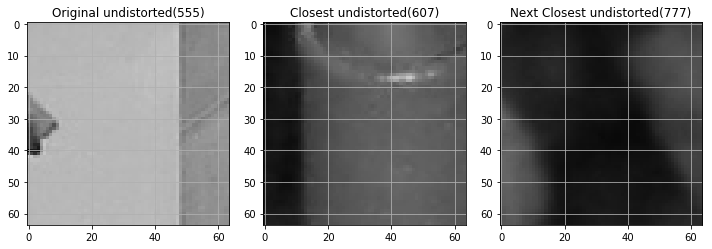

In [34]:
closest_image(gabor_dist_matrix,555)

We test the same images for gabor features using the same closest and next closest detector. Although the result is not perfect for naturally-blurred image, it seems that gabor's features is more fitful in our dataset than DAISY features. However, we still need to test for more to conclude.

As we can see above, DAISY pick up 1368 features out of 64*64 = 4096 fratures while gabor only extract 64 features which is much smaller number of features comparing with the original 4096 features. From now, it is still hard to tell how well they represent our data in the case. Thus, we would like to compute some statistics of the extracted features and do some visualization in the following.  

### 3.4 Statistics of extracted features
Visualize the differences between statistics of extracted features in each target class. For example, a heat map of the pairwise differences (ordered by class) among all extracted features might be appropriate for your data. Based on your visualization, do you think the extracted features are sufficient for classification on your dataset?

In order to represent the target class effectively, images in the same target class should have similar feature representations (values in pairwise-distance matrix should be minimized) while the distance between classes should be maximized. 

First, we begin visualize the pairwise distance matrix using heat map.

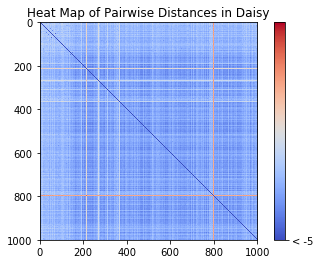

In [35]:
fig, ax = plt.subplots()

cax = ax.imshow(daisy_dist_matrix, cmap=plt.cm.coolwarm)

# adding colorbar
cbar = fig.colorbar(cax, ticks=[-5, 0, 5])
cbar.ax.set_yticklabels(['< -5', '0', '> 5'])  # reference bar
ax.set_title('Heat Map of Pairwise Distances in Daisy')
plt.show()

We expect there should be three relatively more blue squares among the diagonals but in the plot, I can only detect the third big square related to the undistorted images. What we really want to differentiate is artificially-blurred and naturally-blurred wihch did not show in the image. We are going to test for the gabor. 

Populating the interactive namespace from numpy and matplotlib


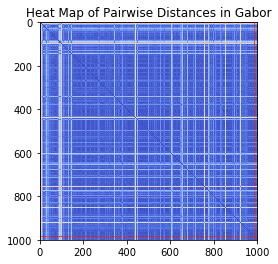

In [60]:
%pylab inline

fig, ax = plt.subplots()

cax = ax.imshow(gabor_dist_matrix, cmap=plt.cm.coolwarm)

ax.set_title('Heat Map of Pairwise Distances in Gabor')
plt.show()

Although the distance matrix seesm to be closer than that of DASIY, we still cannot see the expected pattern (three squares among the diagonal) to show the sufficient evidence that the features extracted is able to make classification. Then, we would to plot a histogram for the distance within class and among different classes. 

In [37]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

print('Seaborn:', sns. __version__)

Seaborn: 0.8.0


Here, we add the distances within atrificially-blurred and distances between atrificially-blurred and the rest two classes. Storing the distances within into x and distances among classes into y, we make a histogram to see the distribution of x and y.  

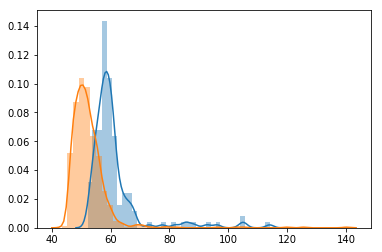

In [38]:
from sklearn import preprocessing
arti_len = len(arti_blur_table)
natu_len = len(natu_blur_table)
undistort = len(undistorted_table)
x = np.zeros(arti_len)
y = np.zeros(natu_len + undistort)
'''first we zoom into arti_blur images'''
for index in range(0,arti_len):
    '''only consider two different type of distances:'''
    x=x+daisy_dist_matrix[index,0:arti_len]    # 1)distance between arti_blur images and itself;
    y=y+daisy_dist_matrix[index,arti_len:1000] # 2)distance between arti_blur images and the rest two classes;
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)
sns.distplot(x)
sns.distplot(y)

We expect that the x distribution should be left of the y distribution 
because the distances within should be generally closer than the distances 
among classes. With a larger shift, the features extracted should be better to make classification. However, the plot cheat me initially since people usually think in the direction of expectation. The plot is totally contrart to our expectation. 

It is possible to think the features extracted also in the opposite direction in order to do the classification. BUT, we will see.
Next, we would like to zoom into natu_blur images.

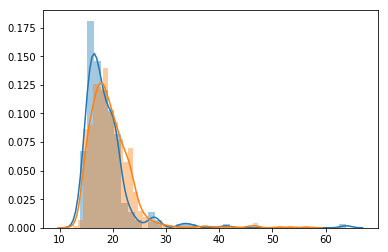

In [39]:
x = np.zeros(natu_len)
y = np.zeros(arti_len + undistort)
middle_len = arti_len+natu_len
'''first we zoom into natu_blur images'''
for index in range(arti_len,natu_len):
    '''only consider two different type of distances:'''
    '''1)distance between natu_blur images and itself;''' 
    x=x+daisy_dist_matrix[index,arti_len:middle_len]    
    '''2)distance between natu_blur images and the rest two classes;''' 
    y=y+np.concatenate((daisy_dist_matrix[index, 0:arti_len], daisy_dist_matrix[index,middle_len:1000])) 
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)
sns.distplot(x)
sns.distplot(y)

For the natu_blur class, there is almost no shift of the x an y distribution which is even worse. we will abandon the DAISY features as our goal is to classification of two blur classes and with less interests in differetiating between the blur and undistorted images. Next, we are going to test for gabor features.

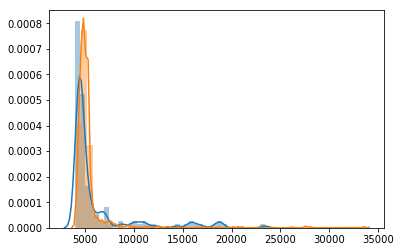

In [40]:
x = np.zeros(arti_len)
y = np.zeros(natu_len + undistort)
'''first we zoom into arti_blur images'''
for index in range(0,arti_len):
    '''only consider two different type of distances:'''
    x=x+gabor_dist_matrix[index,0:arti_len]    # 1)distance between arti_blur images and itself;
    y=y+gabor_dist_matrix[index,arti_len:1000] # 2)distance between arti_blur images and the rest two classes;
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)
sns.distplot(x)
sns.distplot(y)

The gabor features follow our original expectation even if it does not shift sufficiently. we are going to see the natr_blur class and then reach a conclusion.

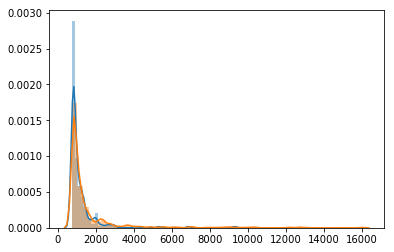

In [41]:
x = np.zeros(natu_len)
y = np.zeros(arti_len + undistort)
middle_len = arti_len+natu_len
'''first we zoom into natu_blur images'''
for index in range(arti_len,natu_len):
    '''only consider two different type of distances:'''
    '''1)distance between natu_blur images and itself;''' 
    x=x+gabor_dist_matrix[index,arti_len:middle_len]    
    '''2)distance between natu_blur images and the rest two classes;''' 
    y=y+np.concatenate((gabor_dist_matrix[index, 0:arti_len], gabor_dist_matrix[index,middle_len:1000])) 
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)
sns.distplot(x)
sns.distplot(y)

As for the natu_blur class, it does not look good because we even did not see any shift here. Then, based on the visualizations, we do not think the extracted features are sufficient for classification on the dataset. We need to search for another new method to do the feature extractions. As it is really hard to identify between atri_blur images and natu_blur images. DAISY and gabor is made mainly to detect the similar shape of the content in images but our case pay less attention to the content but more foucs on the global sensation. Now, we reduce our expectation to identify betweetn anti_blur images and natu_blurred images. We would like to see whether the features extracted from gabor can differentiate between generally blurred images and undistorted images. 

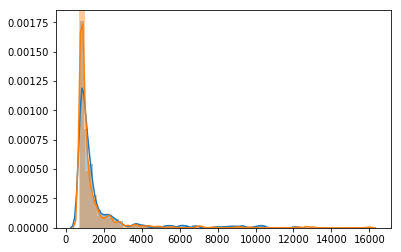

In [42]:
edge_blur = arti_len + natu_len
x = np.zeros(edge_blur)
y = np.zeros(undistort)
'''first we zoom into natu_blur images'''
for index in range(arti_len,natu_len):
    '''only consider two different type of distances:'''
    '''1)distance between natu_blur images and itself;''' 
    x=x+gabor_dist_matrix[index,0:edge_blur]    
    '''2)distance between natu_blur images and the rest two classes;''' 
    y=y+gabor_dist_matrix[index,edge_blur:1000]   
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)
sns.distplot(x)
sns.distplot(y)

Okay...We still did not see the shift and even all of them overlapped. Then, our conclusion about the features extracted using gabor and DAISY are not sufficient to make classification. We will take the work of extracting a subset of features that is possible to classification.

## 4 Exceptional Work
Although our conclusiona about the features extracted are not optimistic, we will look at the subset of gabor features to just classify the blurred (first 370) and undistorted (the rest of 670) images. Our standard to select the subset of features is to minimize the variance within class while keep the variance of total dataset as large as possible. Our filter standard is to sort and keep the top 10 features of them using the equation, 
$$s = var_{total} - var_{blurred} - var_{undistorted}$$
or 
$$s_1 = (var_{total} - var_{blurred})*(var_{total} - var_{undistorted}).$$
We will compare the results of the two standard and select the top eleven largest value of the standards.
Now, let's do it!

In [48]:
new_boundary = arti_len + natu_len
def select_useful_features(features):
    blur_class = features[0:new_boundary]
    undist_class = features[new_boundary:1000]
    blur_within_var = np.var(blur_class,axis=0)
    undist_within_var = np.var(undist_class,axis=0)
    total_var = np.var(features,axis=0)
    standard = total_var-blur_within_var-undist_within_var
    standard1 = np.multiply(total_var-blur_within_var,total_var-undist_within_var)
    dict_st = {}
    dict_st1 = {}
    for idx in range(0,64):
        dict_st[idx] = standard[idx]
        dict_st1[idx] = standard1[idx]
    import operator
    sorted_dict = sorted(dict_st.items(), key=operator.itemgetter(1))
    sorted_dict1 = sorted(dict_st1.items(), key=operator.itemgetter(1))
    top_feature_key = []
    top_feature_key1 = []
    for idx in range(53,64):
        top_feature_key.append(sorted_dict[idx][0])
        top_feature_key1.append(sorted_dict1[idx][0])
    # print the selected feature's number in the original feature matrix
    print(' '.join(['The s result(top 11):',str(top_feature_key)]))
    print(' '.join(['The s1 result(top 11):',str(top_feature_key1)]))
    return top_feature_key,top_feature_key1

In [49]:
# only ectract the subset of gabor features which is more likely to 
# represent the classification (top 11)
top_feature_key,top_feature_key1 = select_useful_features(gabor_features)
gabor_features_updated = gabor_features[:,top_feature_key]
gabor_features_updated.shape

The s result(top 11): [5, 21, 53, 44, 12, 45, 13, 60, 28, 61, 29]
The s1 result(top 11): [21, 5, 37, 45, 12, 44, 13, 61, 29, 28, 60]


(1000, 11)

Here we can see the results of two index in the matrix are quite similar. If we cut-off of the index as 4, the content of two index arrays are the same, so as to curt-off index as 11. Then, in the following, we only keep the top eleven features and do the data visualization.

In [50]:
%time gabor_dist_matrix_new = pairwise_distances(gabor_features_updated)

CPU times: user 27.4 ms, sys: 9.61 ms, total: 37 ms
Wall time: 39.2 ms


In [51]:
gabor_dist_matrix_new.shape

(1000, 1000)

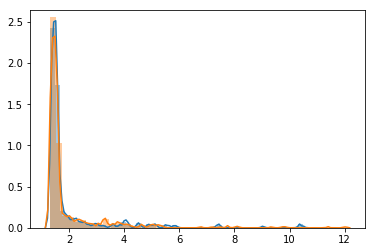

In [52]:
x = np.zeros(new_boundary)
y = np.zeros(undistort)
'''first we zoom into natu_blur images'''
for index in range(new_boundary,1000):
    '''only consider two different type of distances:'''
    '''1)distance between natu_blur images and itself;''' 
    x=x+gabor_dist_matrix_new[index,0:new_boundary]    
    '''2)distance between natu_blur images and the rest two classes;''' 
    y=y+gabor_dist_matrix_new[index,new_boundary:1000]   
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)
sns.distplot(x)
sns.distplot(y)

Populating the interactive namespace from numpy and matplotlib


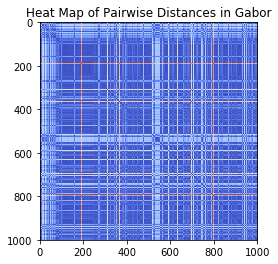

In [53]:
%pylab inline

fig, ax = plt.subplots()

cax = ax.imshow(gabor_dist_matrix_new, cmap=plt.cm.coolwarm)

ax.set_title('Heat Map of Pairwise Distances in Gabor')
plt.show()

Based on the two data visualization (most of the two distribution overlapped and the heat map also does not show any layer), we conclude even the top eleven features, the result is still not good for us to do the classification. We also try the top four or even the first, the result also doesn't look good. Thus, our conclusion about the gabor feature extraction is totally not fit for our dataset. Okay, we are going to try the last chance about following the same rule and see how it works in the DAISY extracted features. As DAISY extract more features than gabor which might contain some useful features.

In [54]:
top_feature_key,top_feature_key1 = select_useful_features(daisy_features)
daisy_features_updated = gabor_features[:,top_feature_key]
daisy_features_updated1 = gabor_features[:,top_feature_key1]

The s result(top 11): [51, 23, 7, 0, 3, 61, 58, 62, 63, 57, 59]
The s1 result(top 11): [22, 40, 43, 18, 11, 3, 25, 21, 16, 17, 1]


In [55]:
%time daisy_dist_matrix_new = pairwise_distances(daisy_features_updated)
%time daisy_dist_matrix_new1 = pairwise_distances(daisy_features_updated1)


CPU times: user 22 ms, sys: 2.29 ms, total: 24.2 ms
Wall time: 15.7 ms
CPU times: user 29.1 ms, sys: 1.38 ms, total: 30.4 ms
Wall time: 16.2 ms


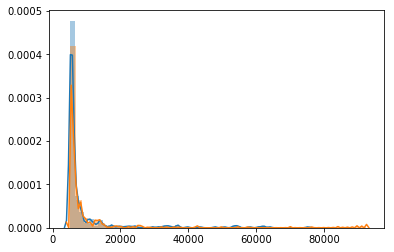

In [56]:
x = np.zeros(new_boundary)
y = np.zeros(undistort)
'''first we zoom into natu_blur images'''
for index in range(new_boundary,1000):
    '''only consider two different type of distances:'''
    '''1)distance between natu_blur images and itself;''' 
    x=x+daisy_dist_matrix_new[index,0:new_boundary]    
    '''2)distance between natu_blur images and the rest two classes;''' 
    y=y+daisy_dist_matrix_new[index,new_boundary:1000]   
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)
sns.distplot(x)
sns.distplot(y)

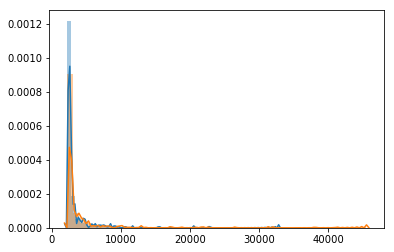

In [57]:
x = np.zeros(new_boundary)
y = np.zeros(undistort)
'''first we zoom into natu_blur images'''
for index in range(new_boundary,1000):
    '''only consider two different type of distances:'''
    '''1)distance between natu_blur images and itself;''' 
    x=x+daisy_dist_matrix_new1[index,0:new_boundary]    
    '''2)distance between natu_blur images and the rest two classes;''' 
    y=y+daisy_dist_matrix_new1[index,new_boundary:1000]   
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)
sns.distplot(x)
sns.distplot(y)

Populating the interactive namespace from numpy and matplotlib


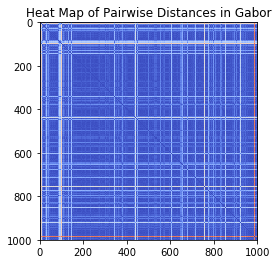

In [58]:
%pylab inline

fig, ax = plt.subplots()

cax = ax.imshow(daisy_dist_matrix_new, cmap=plt.cm.coolwarm)

ax.set_title('Heat Map of Pairwise Distances in Gabor')
plt.show()

Populating the interactive namespace from numpy and matplotlib


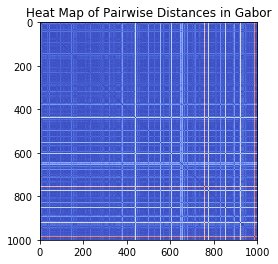

In [59]:
%pylab inline

fig, ax = plt.subplots()

cax = ax.imshow(daisy_dist_matrix_new1, cmap=plt.cm.coolwarm)

ax.set_title('Heat Map of Pairwise Distances in Gabor')
plt.show()

Okay, it does not work for DAISY also. The way to denoise does not work for either extraction method we tried. We need to search for a new feature extraction method which is sensitive to detect the blurred in images.